# 5: Regresión

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel, RFECV

import warnings
warnings.filterwarnings('ignore')

# Carga de la data

In [2]:
df_train1 = pd.read_csv('df_train1_kpi.csv')
df_train3 = pd.read_csv('df_train3_kpi.csv')
df_train2 = pd.read_csv('df_train2_kpi.csv')
df_train4 = pd.read_csv('df_train4_kpi.csv')

df_test1 = pd.read_csv('df_test1_kpi.csv')
df_test3 = pd.read_csv('df_test3_kpi.csv')
df_test2 = pd.read_csv('df_test2_kpi.csv')
df_test4 = pd.read_csv('df_test4_kpi.csv')

In [3]:
df_train1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12,rul,rul_norm,label
0,0,1.0,1.0,0,-0.978417,-0.869179,-0.292733,0.365199,191.0,0.005208,0
1,1,1.0,2.0,1,-0.688356,-0.965539,-0.216275,1.225379,190.0,0.010417,0
2,2,1.0,3.0,2,-0.567306,-0.562371,-1.057313,1.419613,189.0,0.015625,0
3,3,1.0,4.0,3,-0.833386,-0.719638,-1.038198,1.260064,188.0,0.020833,0
4,4,1.0,5.0,4,-0.336628,-0.461920,-1.019084,1.100514,187.0,0.026042,0


In [4]:
df_test1.head()

,Unnamed: 0,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12,RUL,label
0,0,1.0,31.0,372.0,-0.871242,-0.175323,-0.950497,0.075254,112,0
1,1,2.0,49.0,50.0,0.912006,-1.192854,1.295920,-0.014081,98,0
2,2,3.0,126.0,831.0,2.117793,-0.800015,2.368073,-1.639976,69,0
3,3,4.0,106.0,268.0,0.321081,-0.621532,1.193810,0.236057,82,0
4,4,5.0,98.0,392.0,2.188106,-0.386178,0.223766,-1.336237,91,0


In [5]:
df_train1.drop('Unnamed: 0', axis = 1, inplace=True)
df_train3.drop('Unnamed: 0', axis = 1, inplace=True)
df_train2.drop('Unnamed: 0', axis = 1, inplace=True)
df_train4.drop('Unnamed: 0', axis = 1, inplace=True)

df_test1.drop('Unnamed: 0', axis = 1, inplace=True)
df_test3.drop('Unnamed: 0', axis = 1, inplace=True)
df_test2.drop('Unnamed: 0', axis = 1, inplace=True)
df_test4.drop('Unnamed: 0', axis = 1, inplace=True)

In [6]:
df_train1.head()

,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12,rul,rul_norm,label
0,1.0,1.0,0,-0.978417,-0.869179,-0.292733,0.365199,191.0,0.005208,0
1,1.0,2.0,1,-0.688356,-0.965539,-0.216275,1.225379,190.0,0.010417,0
2,1.0,3.0,2,-0.567306,-0.562371,-1.057313,1.419613,189.0,0.015625,0
3,1.0,4.0,3,-0.833386,-0.719638,-1.038198,1.260064,188.0,0.020833,0
4,1.0,5.0,4,-0.336628,-0.461920,-1.019084,1.100514,187.0,0.026042,0


In [7]:
df_test1.head()

,unitNumber,cycle,opset_id,sensorMeasure4,sensorMeasure9,sensorMeasure11,sensorMeasure12,RUL,label
0,1.0,31.0,372.0,-0.871242,-0.175323,-0.950497,0.075254,112,0
1,2.0,49.0,50.0,0.912006,-1.192854,1.295920,-0.014081,98,0
2,3.0,126.0,831.0,2.117793,-0.800015,2.368073,-1.639976,69,0
3,4.0,106.0,268.0,0.321081,-0.621532,1.193810,0.236057,82,0
4,5.0,98.0,392.0,2.188106,-0.386178,0.223766,-1.336237,91,0


In [8]:
caracteristicas1 = df_train1.drop(['unitNumber', 'cycle',
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas3 = df_train3.drop(['unitNumber', 'cycle',
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas2 = df_train2.drop(['unitNumber', 'cycle',
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

caracteristicas4 = df_train4.drop(['unitNumber', 'cycle', 
                                   'rul', 'rul_norm', 'label'], axis = 1).columns

In [9]:
def variables(df_train, df_test, caracteristicas):
    X_train = df_train[caracteristicas]
    X_test = df_test[caracteristicas]

    y_train = df_train.rul
    y_test = df_test.RUL
    
    return X_train, y_train, X_test, y_test

In [10]:
X_train, y_train, X_test, y_test = variables(df_train3, df_test3, caracteristicas3)

# Modelado con técnicas de regresión

In [11]:
X_train.head()

,opset_id,sensorMeasure4,sensorMeasure6,sensorMeasure7,sensorMeasure9,sensorMeasure11,sensorMeasure12,sensorMeasure13,sensorMeasure14,sensorMeasure15
0,147,-0.817614,0.7784,-0.341549,-0.103619,-0.409213,-0.227411,-0.419451,0.063121,0.470206
1,624,-0.812396,0.7784,-0.172693,0.099271,-0.646012,-0.193602,-0.288560,0.521547,0.729910
2,208,0.097635,0.7784,-0.207629,0.302161,-0.679841,-0.313472,-0.124946,0.358389,-0.100481
3,695,-0.317723,0.7784,-0.162504,0.017209,-0.612184,-0.172086,0.038668,0.138612,-0.138527
4,505,-0.733081,0.7784,-0.117378,0.599699,-0.916640,-0.144424,-0.288560,0.214103,-0.153414


In [12]:
y_train.head()

0    258.0
1    257.0
2    256.0
3    255.0
4    254.0
Name: rul, dtype: float64

In [13]:
X_test.head()

,opset_id,sensorMeasure4,sensorMeasure6,sensorMeasure7,sensorMeasure9,sensorMeasure11,sensorMeasure12,sensorMeasure13,sensorMeasure14,sensorMeasure15
0,309.0,1.325965,-0.863395,2.681084,2.459365,1.108375,2.644973,1.440491,2.064139,-2.419622
1,65.0,1.299871,0.954321,-0.554407,-0.460898,1.958583,-0.744353,1.023720,-1.055068,1.394056
2,830.0,2.455250,0.348416,4.065156,2.982864,1.816882,4.214017,2.135109,3.565378,-2.195433
3,124.0,0.846127,0.954321,-0.815044,-0.692625,-0.166937,-0.568961,0.468026,-0.472437,0.957996
4,712.0,-0.502057,-0.863395,-0.334214,-0.467664,-0.969911,-0.346167,-0.434977,-0.601346,-0.118605


In [14]:
y_test.head()

0     44
1     51
2     27
3    120
4    101
Name: RUL, dtype: int64

__Se creará una función que permite calcular las metricas de regresión más importantes__

In [15]:
def metricas(modelo, real, prediccion):
    
    """Calcula las metricas principales de regresión.
    
    Args:
        modelo (str): identificador del modelo empleado.
        real (series): Contiene los valores de las etiquetas de prueba.
        prediccion (series): Contiene los valores predichos.
        
    Returns:
        dataframe: Todas las metricas en un dataframe.
    
    
    """
    
    
    metricas_regresion = {'Root Mean Squared Error' : metrics.mean_squared_error(real, prediccion)**0.5, 
                         'Mean Absolute Error' : metrics.mean_absolute_error(real, prediccion),
                         'R^2' : metrics.r2_score(real, prediccion),
                         'Explained Variance' : metrics.explained_variance_score(real, prediccion),
                        }
    
    df_metricas = pd.DataFrame.from_dict(metricas_regresion, orient= 'index' )
    df_metricas.columns = [modelo]
    
    return df_metricas

__Se creará una función que permita graficar los residuales de regresión.__

# Regresión Lineal

In [16]:
# Regresión lineal

linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

y_test_predict = linreg.predict(X_test)
y_train_predict = linreg.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

linreg_metrics = metricas('Regresión Lineal', y_test, y_test_predict)
linreg_metrics

 R^2 entrenamiento: 0.579 

 R^2 prueba: -1.276


,Regresión Lineal
Root Mean Squared Error,62.452214
Mean Absolute Error,47.477203
R^2,-1.276076
Explained Variance,-1.196820


In [17]:
lineal_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

lineal_pred = pd.DataFrame.from_dict(lineal_predic).T
lineal_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,44.000000,51.000000,27.00000,120.000000,101.00000,99.000000,71.000000,55.000000,55.00000,66.000000,...,81.000000,14.00000,67.000000,10.000000,127.00000,113.000000,123.000000,17.000000,8.000000,28.000000
Predicción,26.936769,40.172232,-32.35439,116.367719,186.19855,81.669289,53.602516,17.333127,64.92746,96.101976,...,94.372573,-90.73025,122.608255,-138.778605,98.02697,53.487193,203.566274,-104.461073,-120.891965,-18.733744


# Regresión Polinomial

In [18]:
# Regresión polinomial

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

polyreg = linear_model.LinearRegression()
polyreg.fit(X_train_poly, y_train)

y_test_predict = polyreg.predict(X_test_poly)
y_train_predict = polyreg.predict(X_train_poly)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

polyreg_metrics = metricas('Regresión Polinomial', y_test, y_test_predict)
polyreg_metrics

 R^2 entrenamiento: 0.639 

 R^2 prueba: -0.757


,Regresión Polinomial
Root Mean Squared Error,54.870856
Mean Absolute Error,44.225488
R^2,-0.757012
Explained Variance,-0.591898


In [19]:
poly_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

poly_pred = pd.DataFrame.from_dict(poly_predic).T
poly_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,44.000000,51.000000,27.000000,120.000000,101.000000,99.000000,71.000000,55.000000,55.000000,66.000000,...,81.000000,14.000000,67.000000,10.000000,127.000000,113.000000,123.000000,17.000000,8.000000,28.000000
Predicción,-1.954145,21.154403,1.620187,100.314589,204.281781,58.542512,30.644589,-2.536038,34.924285,46.222033,...,58.566958,-14.447459,106.357832,37.524848,101.870111,38.492138,224.089221,30.842362,8.652642,-16.708257


# Regresión Árboles de Decisión

In [20]:
# Regresión por árboles de decisión

dtreg = DecisionTreeRegressor(max_depth=7)
dtreg.fit(X_train, y_train)

y_test_predict = dtreg.predict(X_test)
y_train_predict = dtreg.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

dtreg_metrics = metricas('Árboles de Decisión', y_test, y_test_predict)
dtreg_metrics

 R^2 entrenamiento: 0.668 

 R^2 prueba: -0.063


,Árboles de Decisión
Root Mean Squared Error,42.677164
Mean Absolute Error,32.264989
R^2,-0.062875
Explained Variance,-0.052326


In [21]:
dt_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

dt_pred = pd.DataFrame.from_dict(dt_predic).T
dt_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,44.000000,51.000000,27.000000,120.000000,101.000000,99.000000,71.000000,55.00000,55.000000,66.000000,...,81.000000,14.000000,67.000000,10.000000,127.00000,113.000000,123.000000,17.000000,8.000000,28.000000
Predicción,22.573099,22.693548,10.614035,120.971831,196.702409,66.464646,13.904545,10.53012,30.122302,54.083333,...,98.341538,1.428571,98.341538,1.428571,77.47449,31.917241,207.298913,4.133803,1.428571,9.716867


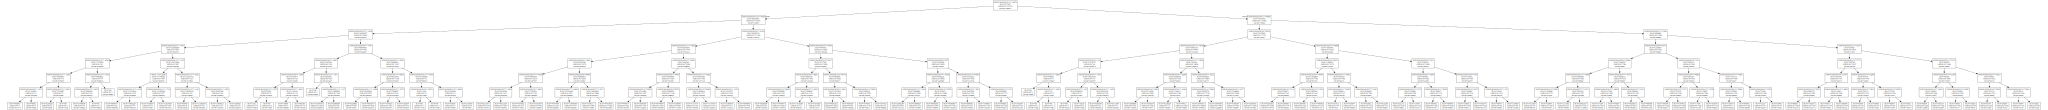

In [22]:
import graphviz

tree = export_graphviz(dtreg, out_file=None, feature_names=caracteristicas3)
graphviz.Source(tree)

In [23]:
atrib = {}

for atributo, importancia in zip(caracteristicas3, dtreg.feature_importances_):
    atrib[atributo] = importancia

importancia = pd.DataFrame.from_dict(atrib, orient = 'index').rename(columns = {0: 'Importancia'})
importancia.sort_values(by ='Importancia', ascending=False)

,Importancia
sensorMeasure11,0.640867
sensorMeasure12,0.154020
sensorMeasure9,0.093470
sensorMeasure6,0.041846
sensorMeasure13,0.027187
sensorMeasure7,0.016632
sensorMeasure14,0.012922
sensorMeasure4,0.011413
sensorMeasure15,0.000856
opset_id,0.000787


In [24]:
dtr_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

dtr_pred = pd.DataFrame.from_dict(dtr_predic).T
dtr_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,44.000000,51.000000,27.000000,120.000000,101.000000,99.000000,71.000000,55.00000,55.000000,66.000000,...,81.000000,14.000000,67.000000,10.000000,127.00000,113.000000,123.000000,17.000000,8.000000,28.000000
Predicción,22.573099,22.693548,10.614035,120.971831,196.702409,66.464646,13.904545,10.53012,30.122302,54.083333,...,98.341538,1.428571,98.341538,1.428571,77.47449,31.917241,207.298913,4.133803,1.428571,9.716867


# Regresión Random Forest

In [25]:
rf = RandomForestRegressor(n_estimators=100, max_depth=4, max_features=3, n_jobs=-1)
rf.fit(X_train, y_train)

y_test_predict = rf.predict(X_test)
y_train_predict = rf.predict(X_train)

print(' R^2 entrenamiento: %.3f \n\n R^2 prueba: %.3f' %(metrics.r2_score(y_train, y_train_predict), 
                                                  metrics.r2_score(y_test, y_test_predict)))

rf_metrics = metricas('Random Forest', y_test, y_test_predict)
rf_metrics

 R^2 entrenamiento: 0.626 

 R^2 prueba: 0.224


,Random Forest
Root Mean Squared Error,36.463948
Mean Absolute Error,25.690785
R^2,0.224077
Explained Variance,0.225176


In [26]:
rf_predic = {'Real': y_test, 
             'Predicción': y_test_predict}

rf_pred = pd.DataFrame.from_dict(rf_predic).T
rf_pred

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Real,44.000000,51.000000,27.000000,120.000000,101.000000,99.0000,71.00000,55.000000,55.000000,66.000000,...,81.00000,14.000000,67.000000,10.000000,127.000000,113.000000,123.00000,17.000000,8.000000,28.000000
Predicción,24.439933,33.819523,10.522167,134.188117,198.206265,64.6681,27.76226,28.099774,51.797723,76.862796,...,95.71053,9.257674,102.267547,9.257674,114.817914,28.348139,179.63816,21.541435,9.257674,18.196565


# Comparando las métricas de regresión

In [27]:
all_metricas = pd.concat([linreg_metrics, polyreg_metrics, dtreg_metrics, rf_metrics], axis = 1)
all_metricas

,Regresión Lineal,Regresión Polinomial,Árboles de Decisión,Random Forest
Root Mean Squared Error,62.452214,54.870856,42.677164,36.463948
Mean Absolute Error,47.477203,44.225488,32.264989,25.690785
R^2,-1.276076,-0.757012,-0.062875,0.224077
Explained Variance,-1.196820,-0.591898,-0.052326,0.225176
